# Supervised Machine Learning

### Content:
- EDA & Preprocessing
- Linear Regression
- Random Forest
- Boosting
- Best Model, Residuals

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#all visuals appear
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [3]:
#import car listings data
path = '/Users/kimballwightman/Desktop/Projects/Car Listings Analysis'

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_prices_clean.csv'), index_col = [0])

In [5]:
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model
0,8995.0,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Acura ILX6-Speed
1,10888.0,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,Acura ILX5-Speed
2,8995.0,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Acura ILX6-Speed
3,10999.0,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,Acura ILX5-Speed
4,14799.0,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,Acura ILXAutomatic


### EDA & Preprocessing

If we make dummy variables for each make/model, we end up with a 852092 x 2757 dataset, which is pretty computationally intense. To simplify the analysis, I'll only look at the 20 most common car make/model and predict their car prices.

This will allow us to be more realistic in predicting car prices, as some models only show up in the dataset once.

In [6]:
df_cars['make_model'].value_counts().head(20)

Chevrolet Silverado     24929
Honda Accord            14502
Ford F-1504WD           14177
Nissan Altima2.5        11288
Honda Civic             11273
GMC Sierra              11208
BMW 3                   11131
Jeep Grand              10895
Jeep Wrangler            7975
Ford Super               7953
Volkswagen Jetta         7340
Hyundai Santa            6708
Ford FusionSE            6386
Chevrolet EquinoxFWD     6223
Dodge Grand              5709
Toyota Tundra            5449
BMW 5                    5348
Lexus RX                 5327
Ford F-1502WD            5144
Toyota CamrySE           4825
Name: make_model, dtype: int64

In [7]:
df_common_makes = df_cars[df_cars['make_model'].isin(['Chevrolet Silverado', 'Honda Accord', 'Ford F-1504WD', 
                                                      'Nissan Altima2.5', 'Honda Civic', 'GMC Sierra', 'BMW 3',
                                                      'Jeep Grand', 'Jeep Wrangler', 'Ford Super', 'Volkswagen Jetta',
                                                      'Hyundai Santa', 'Ford FusionSE','Chevrolet EquinoxFWD', 
                                                      'Dodge Grand', 'Toyota Tundra', 'BMW 5', 'Lexus RX', 
                                                      'Ford F-1502WD', 'Toyota CamrySE'])]

In [8]:
df_common_makes.shape

(183790, 9)

We now have significantly less observations, but plenty for analysis relative to the number of features. Observations dropped from 852,092 to 183,790, but now we only need to add 20 dummy variables as input features instead of around 2000. 

In [9]:
#create dummy variables for each model; drop the first one
df_dummies = pd.get_dummies(df_common_makes, columns = ['make_model'], drop_first=True)
df_dummies.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model_BMW 5,make_model_Chevrolet EquinoxFWD,...,make_model_Honda Accord,make_model_Honda Civic,make_model_Hyundai Santa,make_model_Jeep Grand,make_model_Jeep Wrangler,make_model_Lexus RX,make_model_Nissan Altima2.5,make_model_Toyota CamrySE,make_model_Toyota Tundra,make_model_Volkswagen Jetta
24246,10995.0,2011,10000,SPRING VALLEY,CA,WBAPH5G52BNM82026,BMW,3,0,0,...,0,0,0,0,0,0,0,0,0,0
24247,14299.0,2014,25858,Las Vegas,NV,WBA3B1G58ENS77078,BMW,3,0,0,...,0,0,0,0,0,0,0,0,0,0
24248,11988.0,2011,30000,Duluth,GA,WBAPK7C57BF087014,BMW,3,0,0,...,0,0,0,0,0,0,0,0,0,0
24249,10999.0,2011,45078,Miami Gardens,FL,WBAPH7C56BE674180,BMW,3,0,0,...,0,0,0,0,0,0,0,0,0,0
24250,5991.0,2008,80185,Hollywood,FL,WBAVB77568NH78036,BMW,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#drop unnecessary columns for regression
df_dummies = df_dummies.drop(columns = ['City','State','Vin','Make','Model'])
df_dummies.head()

,Price,Year,Mileage,make_model_BMW 5,make_model_Chevrolet EquinoxFWD,make_model_Chevrolet Silverado,make_model_Dodge Grand,make_model_Ford F-1502WD,make_model_Ford F-1504WD,make_model_Ford FusionSE,...,make_model_Honda Accord,make_model_Honda Civic,make_model_Hyundai Santa,make_model_Jeep Grand,make_model_Jeep Wrangler,make_model_Lexus RX,make_model_Nissan Altima2.5,make_model_Toyota CamrySE,make_model_Toyota Tundra,make_model_Volkswagen Jetta
24246,10995.0,2011,10000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24247,14299.0,2014,25858,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24248,11988.0,2011,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24249,10999.0,2011,45078,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24250,5991.0,2008,80185,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_dummies.shape

(183790, 22)

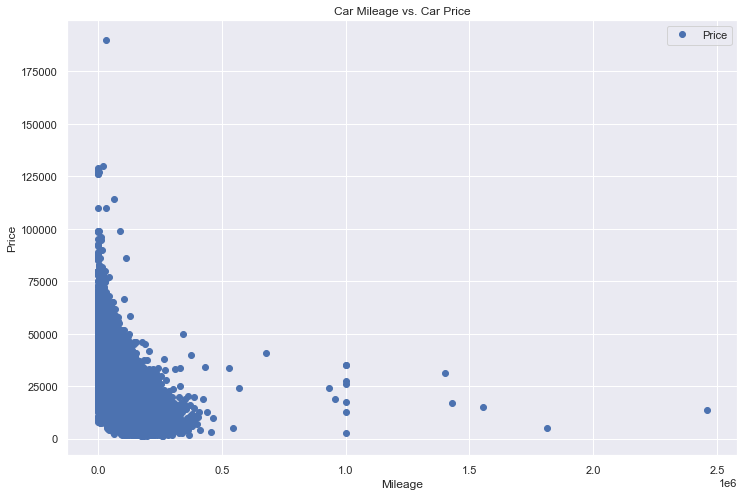

In [12]:
#explore data visually with a scatterplot
df_dummies.plot(x = 'Mileage', y='Price',style='o', figsize=(12,8))
plt.title('Car Mileage vs. Car Price')  
plt.xlabel('Mileage')  
plt.ylabel('Price') 
plt.show()

Overall, car price decreases as mileage gets higher.

In [13]:
#split into training and test sets for measuring out-of-sample fit
X = df_dummies.loc[:,df_dummies.columns != 'Price'].values.reshape(-1,21)
y = df_dummies['Price'].values.reshape(-1,1)

In [14]:
X

array([[  2011,  10000,      0, ...,      0,      0,      0],
       [  2014,  25858,      0, ...,      0,      0,      0],
       [  2011,  30000,      0, ...,      0,      0,      0],
       ...,
       [  2015,  40310,      0, ...,      0,      0,      1],
       [  2015,  40099,      0, ...,      0,      0,      1],
       [  2015, 999999,      0, ...,      0,      0,      1]])

In [15]:
y

array([[10995.],
       [14299.],
       [11988.],
       ...,
       [22995.],
       [23999.],
       [12889.]])

#### Supervised ML Techniques:
- We're going to try linear regression, random forest, and boosting techniques to see which model can produce the best predictions for car price. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Linear Regression

In [17]:
reg = LinearRegression().fit(X_train, y_train)

In [18]:
yhat_reg = reg.predict(X_test)

In [19]:
#model performance
rmse_reg = mean_squared_error(y_test, yhat_reg)
r2_reg = r2_score(y_test, yhat_reg)

print('Coefficients:' ,reg.coef_)
print('Mean squared error: ', rmse_reg)
print('R2 score: ', r2_reg)

Coefficients: [[ 1.52708167e+03 -6.13196043e-02  4.08975580e+03 -8.32516989e+03
   7.10313667e+03 -8.58128028e+03  2.73177132e+03  7.55907067e+03
  -1.16586981e+04  1.63026238e+04  9.45231025e+03 -6.99366342e+03
  -9.95013538e+03 -6.67618479e+03  1.99178263e+03  6.78169057e+03
   5.51518760e+03 -1.21081731e+04 -1.09515320e+04  7.66406618e+03
  -1.18621200e+04]]
Mean squared error:  28956566.934110984
R2 score:  0.7732679098481482


### Random Forest

In [21]:
#cross validation - I first identified 20 as the optimal max depth to simplify the computation
param_grid = {'n_estimators': [1100,1200,1300], 'max_depth': [20], 'max_features': ['sqrt']}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train.ravel())
print("Best number of trees (n_estimators): ", best_model.best_estimator_.get_params()['n_estimators'])
print("Best tree depth (max_depth): ", best_model.best_estimator_.get_params()['max_depth'])
print("Best tree depth (max_features): ", best_model.best_estimator_.get_params()['max_features'])

Best number of trees (n_estimators):  1300
Best tree depth (max_depth):  20
Best tree depth (max_features):  sqrt


In [23]:
rf = RandomForestRegressor(n_estimators = 1300, max_depth = 20, max_features = 'sqrt').fit(X_train, y_train.ravel())

In [24]:
yhat_rf = rf.predict(X_test)

In [25]:
#model performance
rmse_rf = mean_squared_error(y_test, yhat_rf)
r2_rf = r2_score(y_test, yhat_rf)

print('Mean squared error: ', rmse_rf)
print('R2 score: ', r2_rf)

Mean squared error:  23573407.609014172
R2 score:  0.8154184509733061


### Boosting

In [27]:
#cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [1100,1200,1300], 'learning_rate': [0.01,0.1,0.5]}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train.ravel())
print("Best number of trees (n_estimators): ", best_model.best_estimator_.get_params()['n_estimators'])
print("Best tree depth (learning_rate): ", best_model.best_estimator_.get_params()['learning_rate'])

Best number of trees (n_estimators):  1300
Best tree depth (learning_rate):  0.1


In [29]:
gb = GradientBoostingRegressor(n_estimators = 1300, learning_rate = 0.1).fit(X_train, y_train.ravel())

In [30]:
yhat_gb = gb.predict(X_test)

In [31]:
#model performance
rmse_gb = mean_squared_error(y_test, yhat_gb)
r2_gb = r2_score(y_test, yhat_gb)

print('Mean squared error: ', rmse_gb)
print('R2 score: ', r2_gb)

Mean squared error:  21684954.09352918
R2 score:  0.8302051835889096


### Best Model, Residuals

Gradient boosting was the most accurate model with 83% accuracy on out-of-sample data. We'll use its predicted values to get residuals. 

In [32]:
#compare the predicted and actual values in a df
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat_gb.flatten()})
data.head(30)

,Actual,Predicted
0,22999.0,22885.108778
1,20998.0,18657.707988
2,13898.0,14641.009517
3,14995.0,14795.533095
4,43249.0,36884.375017
5,11871.0,13834.578629
6,21995.0,13136.338992
7,15995.0,17312.908155
8,17649.0,18226.567739
9,37878.0,33175.736320


In [33]:
#predict values for all values, not just the test dataset
yhat = gb.predict(X)

In [34]:
yhat = yhat.ravel()

In [35]:
df_dummies['Predicted'] = yhat

In [36]:
df_dummies['Residual'] = df_dummies['Price'] - df_dummies['Predicted']

In [37]:
df_dummies.columns

Index(['Price', 'Year', 'Mileage', 'make_model_BMW 5',
       'make_model_Chevrolet EquinoxFWD', 'make_model_Chevrolet Silverado',
       'make_model_Dodge Grand', 'make_model_Ford F-1502WD',
       'make_model_Ford F-1504WD', 'make_model_Ford FusionSE',
       'make_model_Ford Super', 'make_model_GMC Sierra',
       'make_model_Honda Accord', 'make_model_Honda Civic',
       'make_model_Hyundai Santa', 'make_model_Jeep Grand',
       'make_model_Jeep Wrangler', 'make_model_Lexus RX',
       'make_model_Nissan Altima2.5', 'make_model_Toyota CamrySE',
       'make_model_Toyota Tundra', 'make_model_Volkswagen Jetta', 'Predicted',
       'Residual'],
      dtype='object')

In [38]:
#reorder columns to bring predicted and residual to the front
reorder_cols = ['Price', 'Predicted', 'Residual', 'Year', 'Mileage', 'make_model_BMW 5',
       'make_model_Chevrolet EquinoxFWD', 'make_model_Chevrolet Silverado',
       'make_model_Dodge Grand', 'make_model_Ford F-1502WD',
       'make_model_Ford F-1504WD', 'make_model_Ford FusionSE',
       'make_model_Ford Super', 'make_model_GMC Sierra',
       'make_model_Honda Accord', 'make_model_Honda Civic',
       'make_model_Hyundai Santa', 'make_model_Jeep Grand',
       'make_model_Jeep Wrangler', 'make_model_Lexus RX',
       'make_model_Nissan Altima2.5', 'make_model_Toyota CamrySE',
       'make_model_Toyota Tundra', 'make_model_Volkswagen Jetta']

df_resid = df_dummies[reorder_cols]

In [39]:
df_resid.head()

,Price,Predicted,Residual,Year,Mileage,make_model_BMW 5,make_model_Chevrolet EquinoxFWD,make_model_Chevrolet Silverado,make_model_Dodge Grand,make_model_Ford F-1502WD,...,make_model_Honda Accord,make_model_Honda Civic,make_model_Hyundai Santa,make_model_Jeep Grand,make_model_Jeep Wrangler,make_model_Lexus RX,make_model_Nissan Altima2.5,make_model_Toyota CamrySE,make_model_Toyota Tundra,make_model_Volkswagen Jetta
24246,10995.0,22475.178872,-11480.178872,2011,10000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24247,14299.0,25745.109549,-11446.109549,2014,25858,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24248,11988.0,20217.256650,-8229.256650,2011,30000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24249,10999.0,19173.006276,-8174.006276,2011,45078,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24250,5991.0,13495.097312,-7504.097312,2008,80185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Residual', ylabel='Count'>

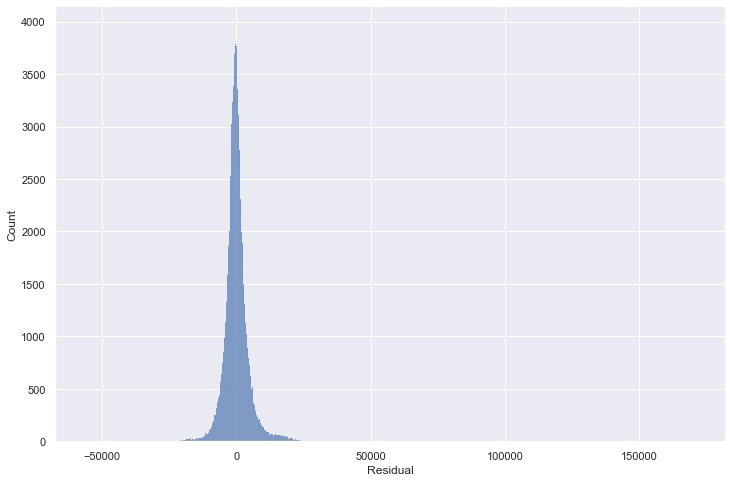

In [40]:
sns.histplot(data=df_resid['Residual'])

In [41]:
#merge with original subset to get other variables for analysis
df_merge = df_common_makes.merge(df_resid, on = ['Price','Year','Mileage'], indicator = True)
df_merge.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,Predicted,...,make_model_Honda Civic,make_model_Hyundai Santa,make_model_Jeep Grand,make_model_Jeep Wrangler,make_model_Lexus RX,make_model_Nissan Altima2.5,make_model_Toyota CamrySE,make_model_Toyota Tundra,make_model_Volkswagen Jetta,_merge
0,10995.0,2011,10000,SPRING VALLEY,CA,WBAPH5G52BNM82026,BMW,3,BMW 3,22475.178872,...,0,0,0,0,0,0,0,0,0,both
1,14299.0,2014,25858,Las Vegas,NV,WBA3B1G58ENS77078,BMW,3,BMW 3,25745.109549,...,0,0,0,0,0,0,0,0,0,both
2,11988.0,2011,30000,Duluth,GA,WBAPK7C57BF087014,BMW,3,BMW 3,20217.256650,...,0,0,0,0,0,0,0,0,0,both
3,10999.0,2011,45078,Miami Gardens,FL,WBAPH7C56BE674180,BMW,3,BMW 3,19173.006276,...,0,0,0,0,0,0,0,0,0,both
4,5991.0,2008,80185,Hollywood,FL,WBAVB77568NH78036,BMW,3,BMW 3,13495.097312,...,0,0,0,0,0,0,0,0,0,both


In [42]:
#make sure it merged correctly
df_merge['_merge'].value_counts()

both          184452
left_only          0
right_only         0
Name: _merge, dtype: int64

In [43]:
df_merge.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model',
       'make_model', 'Predicted', 'Residual', 'make_model_BMW 5',
       'make_model_Chevrolet EquinoxFWD', 'make_model_Chevrolet Silverado',
       'make_model_Dodge Grand', 'make_model_Ford F-1502WD',
       'make_model_Ford F-1504WD', 'make_model_Ford FusionSE',
       'make_model_Ford Super', 'make_model_GMC Sierra',
       'make_model_Honda Accord', 'make_model_Honda Civic',
       'make_model_Hyundai Santa', 'make_model_Jeep Grand',
       'make_model_Jeep Wrangler', 'make_model_Lexus RX',
       'make_model_Nissan Altima2.5', 'make_model_Toyota CamrySE',
       'make_model_Toyota Tundra', 'make_model_Volkswagen Jetta', '_merge'],
      dtype='object')

In [44]:
df_merge = df_merge.drop(columns = ['make_model_BMW 5',
       'make_model_Chevrolet EquinoxFWD', 'make_model_Chevrolet Silverado',
       'make_model_Dodge Grand', 'make_model_Ford F-1502WD',
       'make_model_Ford F-1504WD', 'make_model_Ford FusionSE',
       'make_model_Ford Super', 'make_model_GMC Sierra',
       'make_model_Honda Accord', 'make_model_Honda Civic',
       'make_model_Hyundai Santa', 'make_model_Jeep Grand',
       'make_model_Jeep Wrangler', 'make_model_Lexus RX',
       'make_model_Nissan Altima2.5', 'make_model_Toyota CamrySE',
       'make_model_Toyota Tundra', 'make_model_Volkswagen Jetta', '_merge'])

In [45]:
df_merge.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,Predicted,Residual
0,10995.0,2011,10000,SPRING VALLEY,CA,WBAPH5G52BNM82026,BMW,3,BMW 3,22475.178872,-11480.178872
1,14299.0,2014,25858,Las Vegas,NV,WBA3B1G58ENS77078,BMW,3,BMW 3,25745.109549,-11446.109549
2,11988.0,2011,30000,Duluth,GA,WBAPK7C57BF087014,BMW,3,BMW 3,20217.256650,-8229.256650
3,10999.0,2011,45078,Miami Gardens,FL,WBAPH7C56BE674180,BMW,3,BMW 3,19173.006276,-8174.006276
4,5991.0,2008,80185,Hollywood,FL,WBAVB77568NH78036,BMW,3,BMW 3,13495.097312,-7504.097312


In [46]:
df_merge.shape

(184452, 11)

In [47]:
#look at summary statistics for each make_model
df_merge.groupby('make_model').agg({'Residual':['mean','median','max','min']})

Residual                                          
                            mean       median            max           min
make_model                                                                
BMW 3                -347.914213 -1178.834500   23182.598422 -13601.663246
BMW 5                   2.796630  -466.939879   27343.143835 -15087.020966
Chevrolet EquinoxFWD   15.549239  -197.678045   16478.633007  -7682.654828
Chevrolet Silverado    22.375711 -1065.280861   45914.711206 -20123.722717
Dodge Grand             4.162016  -140.828036  170454.468691  -6241.625450
Ford F-1502WD          15.688816  -329.302943   21457.203863 -12029.937147
Ford F-1504WD          30.528063  -595.095962   91752.633040 -24435.019033
Ford FusionSE           7.936123   -96.157357   86686.491868 -10811.637247
Ford Super            -56.421287  1219.072299   59878.339514 -30973.175069
GMC Sierra              4.782245  -794.788647   73584.175385 -26303.483009
Honda Accord            1.371536  -119.306829   13558.213185 -11599.233786
Honda Civic            26.558386  -204.906257   26514.230439 -10102.192777
Hyundai Santa         -20.848486  -448.246233   15789.255919  -9833.123200
Jeep Grand             40.914477  -391.525529   40209.582249 -13332.794677
Jeep Wrangler          39.357144  -431.393587   46228.355677 -13964.142195
Lexus RX               50.268218    42.327608   10991.102774 -10935.043575
Nissan Altima2.5      -11.132758  -293.667960   14754.254247  -8035.235337
Toyota CamrySE         16.230411    -2.728443   12689.264006  -8597.513427
Toyota Tundra         -51.164051   179.833201   36246.653783 -56135.027820
Volkswagen Jetta       39.488049  -168.643467   12931.574497  -8125.560255

In [48]:
df_merge['Residual'].describe()

count    184452.000000
mean        -10.009560
std        4570.356330
min      -56135.027820
25%       -2174.859768
50%        -310.379239
75%        1733.785536
max      170454.468691
Name: Residual, dtype: float64

In [49]:
#export data with predicted values and residuals
df_merge.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_residual.csv'))